### Team 26 MTA MNR Virtual Hackathon

import required libraries

In [296]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

Split the dataset to training and testing initially for feature extraction. This method would increase predicition of best models with only important feature columns.

Import training dataset

In [297]:
train_data = pd.read_csv("https://raw.githubusercontent.com/PriyaShaji/MTAMNR_VirtualHackathon/master/Datasets/lirr_train_data.csv")
train_data.shape

(164, 18)

Import testing dataset

In [298]:
test_data = pd.read_csv("https://raw.githubusercontent.com/PriyaShaji/MTAMNR_VirtualHackathon/master/Datasets/lirr_test_data.csv")
test_data.shape

(823, 18)

In [299]:
train_data.head()

,LW_ID,RSU_ID,LW_DATE,LW_FRONT,LW_BACK,DOOR_ZONE_FRONT,DOOR_ZONE_BACK,UPDATED_TIME,TRANSACTION_ID,SOURCE_CAR_NBR,POI_CODE,POI_NUM,MIN_BASELINE,MIN_BASELINE_UPDATED_TIME,THREE_HR_LW_MIN,PASSENGER_LEVEL,NUM_OF_PASSENGERS,DOOR_STATUS
0,434,7427,07/15/2020 02:29:44,69,61,0,0,07/15/2020 02:29:46,26032975,7427,HYD,95,65,07/15/2020 01:38:21,65,1,3,CLOSED
1,435,7428,07/15/2020 02:29:44,68,60,0,1,07/15/2020 02:29:46,26032975,7427,HYD,95,63,07/15/2020 01:38:21,63,1,6,CLOSED
2,88,7182,07/15/2020 09:50:36,65,58,1,1,07/15/2020 09:50:39,26257927,7181,HYD,95,62,07/15/2020 09:50:39,68,0,0,OPEN
3,170,7429,07/15/2020 09:52:59,67,62,1,0,07/15/2020 09:53:08,26259233,7429,0,0,65,07/15/2020 08:53:07,65,0,0,OPEN
4,171,7430,07/15/2020 09:52:59,67,59,1,1,07/15/2020 09:53:08,26259233,7429,0,0,63,07/15/2020 08:53:07,63,0,0,OPEN


### Data Exploration

In [300]:
train_data.dtypes

LW_ID                         int64
RSU_ID                        int64
LW_DATE                      object
LW_FRONT                      int64
LW_BACK                       int64
DOOR_ZONE_FRONT               int64
DOOR_ZONE_BACK                int64
UPDATED_TIME                 object
TRANSACTION_ID                int64
SOURCE_CAR_NBR                int64
POI_CODE                     object
POI_NUM                      object
MIN_BASELINE                  int64
MIN_BASELINE_UPDATED_TIME    object
THREE_HR_LW_MIN               int64
PASSENGER_LEVEL               int64
NUM_OF_PASSENGERS             int64
DOOR_STATUS                  object
dtype: object

In [301]:
test_data.head()

,LW_ID,RSU_ID,LW_DATE,LW_FRONT,LW_BACK,DOOR_ZONE_FRONT,DOOR_ZONE_BACK,UPDATED_TIME,TRANSACTION_ID,SOURCE_CAR_NBR,POI_CODE,POI_NUM,MIN_BASELINE,MIN_BASELINE_UPDATED_TIME,THREE_HR_LW_MIN,PASSENGER_LEVEL,NUM_OF_PASSENGERS,DOOR_STATUS
0,656.0,7264.0,07/15/2020 10:43:16,66.0,59.0,1.0,1.0,07/15/2020 10:43:19,26286229.0,7766.0,0,0,62.0,07/15/2020 10:13:39,62.0,1.0,6.0,OPEN
1,783.0,7765.0,07/15/2020 10:43:16,67.0,60.0,1.0,0.0,07/15/2020 10:43:19,26286229.0,7766.0,0,0,63.0,07/15/2020 08:50:59,63.0,1.0,6.0,OPEN
2,782.0,7766.0,07/15/2020 10:43:16,67.0,60.0,1.0,1.0,07/15/2020 10:43:19,26286229.0,7766.0,0,0,63.0,07/15/2020 10:34:19,64.0,1.0,6.0,OPEN
3,774.0,7576.0,07/15/2020 10:43:16,67.0,59.0,1.0,1.0,07/15/2020 10:43:19,26286229.0,7766.0,0,0,62.0,07/15/2020 09:32:39,63.0,1.0,6.0,OPEN
4,773.0,7575.0,07/15/2020 10:43:16,67.0,60.0,1.0,0.0,07/15/2020 10:43:19,26286229.0,7766.0,0,0,63.0,07/15/2020 09:36:59,63.0,1.0,3.0,OPEN


Create a dataset with target variable and it can be used for prediction dataset by the end

In [302]:
mtamnr = pd.DataFrame({'RSU_ID': test_data['RSU_ID']})
mtamnr.head()

,RSU_ID
0,7264.0
1,7765.0
2,7766.0
3,7576.0
4,7575.0


Data distribution of target variable. Our target variable is "MIN_BASELINE" as it gives passenger occupany count which can greatly contribute in prediction of the same

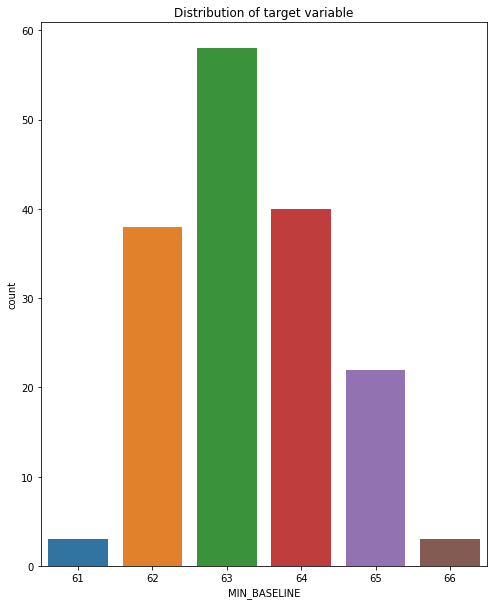

In [303]:
plt.title('Distribution of target variable')
sns.countplot(train_data['MIN_BASELINE'])
plt.show()

Analyzing the target variable

In [304]:

train_data['MIN_BASELINE'].value_counts()

63    58
64    40
62    38
65    22
66     3
61     3
Name: MIN_BASELINE, dtype: int64

### Data Processing

Cleaning test abd train datasets from zero's and missing values

In [305]:
train_data.isna().sum()

LW_ID                        0
RSU_ID                       0
LW_DATE                      0
LW_FRONT                     0
LW_BACK                      0
DOOR_ZONE_FRONT              0
DOOR_ZONE_BACK               0
UPDATED_TIME                 0
TRANSACTION_ID               0
SOURCE_CAR_NBR               0
POI_CODE                     0
POI_NUM                      0
MIN_BASELINE                 0
MIN_BASELINE_UPDATED_TIME    0
THREE_HR_LW_MIN              0
PASSENGER_LEVEL              0
NUM_OF_PASSENGERS            0
DOOR_STATUS                  0
dtype: int64

In [306]:
test_data.isna().sum()

LW_ID                        164
RSU_ID                       164
LW_DATE                      164
LW_FRONT                     164
LW_BACK                      164
DOOR_ZONE_FRONT              164
DOOR_ZONE_BACK               164
UPDATED_TIME                 164
TRANSACTION_ID               164
SOURCE_CAR_NBR               164
POI_CODE                     164
POI_NUM                      164
MIN_BASELINE                 165
MIN_BASELINE_UPDATED_TIME    165
THREE_HR_LW_MIN              165
PASSENGER_LEVEL              164
NUM_OF_PASSENGERS            164
DOOR_STATUS                  164
dtype: int64

In [307]:
train_data.nunique()

LW_ID                        164
RSU_ID                       164
LW_DATE                       27
LW_FRONT                       7
LW_BACK                        8
DOOR_ZONE_FRONT                2
DOOR_ZONE_BACK                 2
UPDATED_TIME                  27
TRANSACTION_ID                35
SOURCE_CAR_NBR                35
POI_CODE                       7
POI_NUM                        7
MIN_BASELINE                   6
MIN_BASELINE_UPDATED_TIME    126
THREE_HR_LW_MIN                7
PASSENGER_LEVEL                2
NUM_OF_PASSENGERS              7
DOOR_STATUS                    2
dtype: int64

In [308]:
test_data.nunique()

LW_ID                        659
RSU_ID                       659
LW_DATE                       13
LW_FRONT                      10
LW_BACK                       11
DOOR_ZONE_FRONT                2
DOOR_ZONE_BACK                 2
UPDATED_TIME                  13
TRANSACTION_ID                68
SOURCE_CAR_NBR                68
POI_CODE                      18
POI_NUM                       18
MIN_BASELINE                   9
MIN_BASELINE_UPDATED_TIME    615
THREE_HR_LW_MIN                9
PASSENGER_LEVEL                2
NUM_OF_PASSENGERS             10
DOOR_STATUS                    2
dtype: int64

Drop columns which will be of no use for our model

In [309]:
col_list = ['LW_ID', 'LW_DATE', 'UPDATED_TIME', 'TRANSACTION_ID', 'MIN_BASELINE_UPDATED_TIME']

In [310]:

train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [311]:
train_data.head()

,RSU_ID,LW_FRONT,LW_BACK,DOOR_ZONE_FRONT,DOOR_ZONE_BACK,SOURCE_CAR_NBR,POI_CODE,POI_NUM,MIN_BASELINE,THREE_HR_LW_MIN,PASSENGER_LEVEL,NUM_OF_PASSENGERS,DOOR_STATUS
0,7427,69,61,0,0,7427,HYD,95,65,65,1,3,CLOSED
1,7428,68,60,0,1,7427,HYD,95,63,63,1,6,CLOSED
2,7182,65,58,1,1,7181,HYD,95,62,68,0,0,OPEN
3,7429,67,62,1,0,7429,0,0,65,65,0,0,OPEN
4,7430,67,59,1,1,7429,0,0,63,63,0,0,OPEN


In [312]:
train_data.isna().sum()

RSU_ID               0
LW_FRONT             0
LW_BACK              0
DOOR_ZONE_FRONT      0
DOOR_ZONE_BACK       0
SOURCE_CAR_NBR       0
POI_CODE             0
POI_NUM              0
MIN_BASELINE         0
THREE_HR_LW_MIN      0
PASSENGER_LEVEL      0
NUM_OF_PASSENGERS    0
DOOR_STATUS          0
dtype: int64

In [313]:
test_data.isna().sum()

RSU_ID               164
LW_FRONT             164
LW_BACK              164
DOOR_ZONE_FRONT      164
DOOR_ZONE_BACK       164
SOURCE_CAR_NBR       164
POI_CODE             164
POI_NUM              164
MIN_BASELINE         165
THREE_HR_LW_MIN      165
PASSENGER_LEVEL      164
NUM_OF_PASSENGERS    164
DOOR_STATUS          164
dtype: int64

Create a function to impute with None

In [314]:

def impute_none(imp_none_list):
    for i in imp_none_list:
        train_data[i] = train_data[i].fillna('None')
        test_data[i] = test_data[i].fillna('None')

In [315]:
imp_none_list = ['POI_CODE', 'POI_NUM','DOOR_STATUS']
impute_none(imp_none_list)

Create a function to impute missing values by rounded value of mean

In [316]:

def round_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))

In [317]:
imp_mean_list = ['RSU_ID', 'LW_FRONT', 'LW_BACK', 'DOOR_ZONE_FRONT', 'DOOR_ZONE_BACK', 'SOURCE_CAR_NBR', 'MIN_BASELINE', 'THREE_HR_LW_MIN', 'PASSENGER_LEVEL', 'NUM_OF_PASSENGERS']
round_mean(imp_mean_list)

Create a scaled set to be used in model to improve the results

In [318]:

from sklearn.preprocessing import minmax_scale
train_data[['LW_FRONT', 'LW_BACK', 'DOOR_ZONE_FRONT', 'DOOR_ZONE_BACK', 'MIN_BASELINE', 'THREE_HR_LW_MIN', 'PASSENGER_LEVEL', 'NUM_OF_PASSENGERS']] = minmax_scale(
    train_data[['LW_FRONT', 'LW_BACK', 'DOOR_ZONE_FRONT', 'DOOR_ZONE_BACK', 'MIN_BASELINE', 'THREE_HR_LW_MIN', 'PASSENGER_LEVEL', 'NUM_OF_PASSENGERS']])

test_data[['LW_FRONT', 'LW_BACK', 'DOOR_ZONE_FRONT', 'DOOR_ZONE_BACK', 'MIN_BASELINE', 'THREE_HR_LW_MIN', 'PASSENGER_LEVEL', 'NUM_OF_PASSENGERS']] = minmax_scale(
    test_data[['LW_FRONT', 'LW_BACK', 'DOOR_ZONE_FRONT', 'DOOR_ZONE_BACK', 'MIN_BASELINE', 'THREE_HR_LW_MIN', 'PASSENGER_LEVEL', 'NUM_OF_PASSENGERS']])

In [319]:
train_data.head()

,RSU_ID,LW_FRONT,LW_BACK,DOOR_ZONE_FRONT,DOOR_ZONE_BACK,SOURCE_CAR_NBR,POI_CODE,POI_NUM,MIN_BASELINE,THREE_HR_LW_MIN,PASSENGER_LEVEL,NUM_OF_PASSENGERS,DOOR_STATUS
0,7427,0.833333,0.571429,0.0,0.0,7427,HYD,95,0.8,0.571429,1.0,0.166667,CLOSED
1,7428,0.666667,0.428571,0.0,1.0,7427,HYD,95,0.4,0.285714,1.0,0.333333,CLOSED
2,7182,0.166667,0.142857,1.0,1.0,7181,HYD,95,0.2,1.000000,0.0,0.000000,OPEN
3,7429,0.500000,0.714286,1.0,0.0,7429,0,0,0.8,0.571429,0.0,0.000000,OPEN
4,7430,0.500000,0.285714,1.0,1.0,7429,0,0,0.4,0.285714,0.0,0.000000,OPEN


Function to LabelEncode all the non numerical values

In [320]:

def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [321]:
train_data = create_dummies(train_data)

POI_CODE encoded
POI_NUM encoded
DOOR_STATUS encoded


/Users/priyashaji/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [322]:
test_data = create_dummies(test_data)

POI_CODE encoded
POI_NUM encoded
DOOR_STATUS encoded


/Users/priyashaji/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [323]:
train_data.dtypes

RSU_ID                 int64
LW_FRONT             float64
LW_BACK              float64
DOOR_ZONE_FRONT      float64
DOOR_ZONE_BACK       float64
SOURCE_CAR_NBR         int64
POI_CODE               int64
POI_NUM                int64
MIN_BASELINE         float64
THREE_HR_LW_MIN      float64
PASSENGER_LEVEL      float64
NUM_OF_PASSENGERS    float64
DOOR_STATUS            int64
dtype: object

In [324]:
test_data.dtypes

RSU_ID               float64
LW_FRONT             float64
LW_BACK              float64
DOOR_ZONE_FRONT      float64
DOOR_ZONE_BACK       float64
SOURCE_CAR_NBR       float64
POI_CODE               int64
POI_NUM                int64
MIN_BASELINE         float64
THREE_HR_LW_MIN      float64
PASSENGER_LEVEL      float64
NUM_OF_PASSENGERS    float64
DOOR_STATUS            int64
dtype: object

Plot a heatmap for all the variables

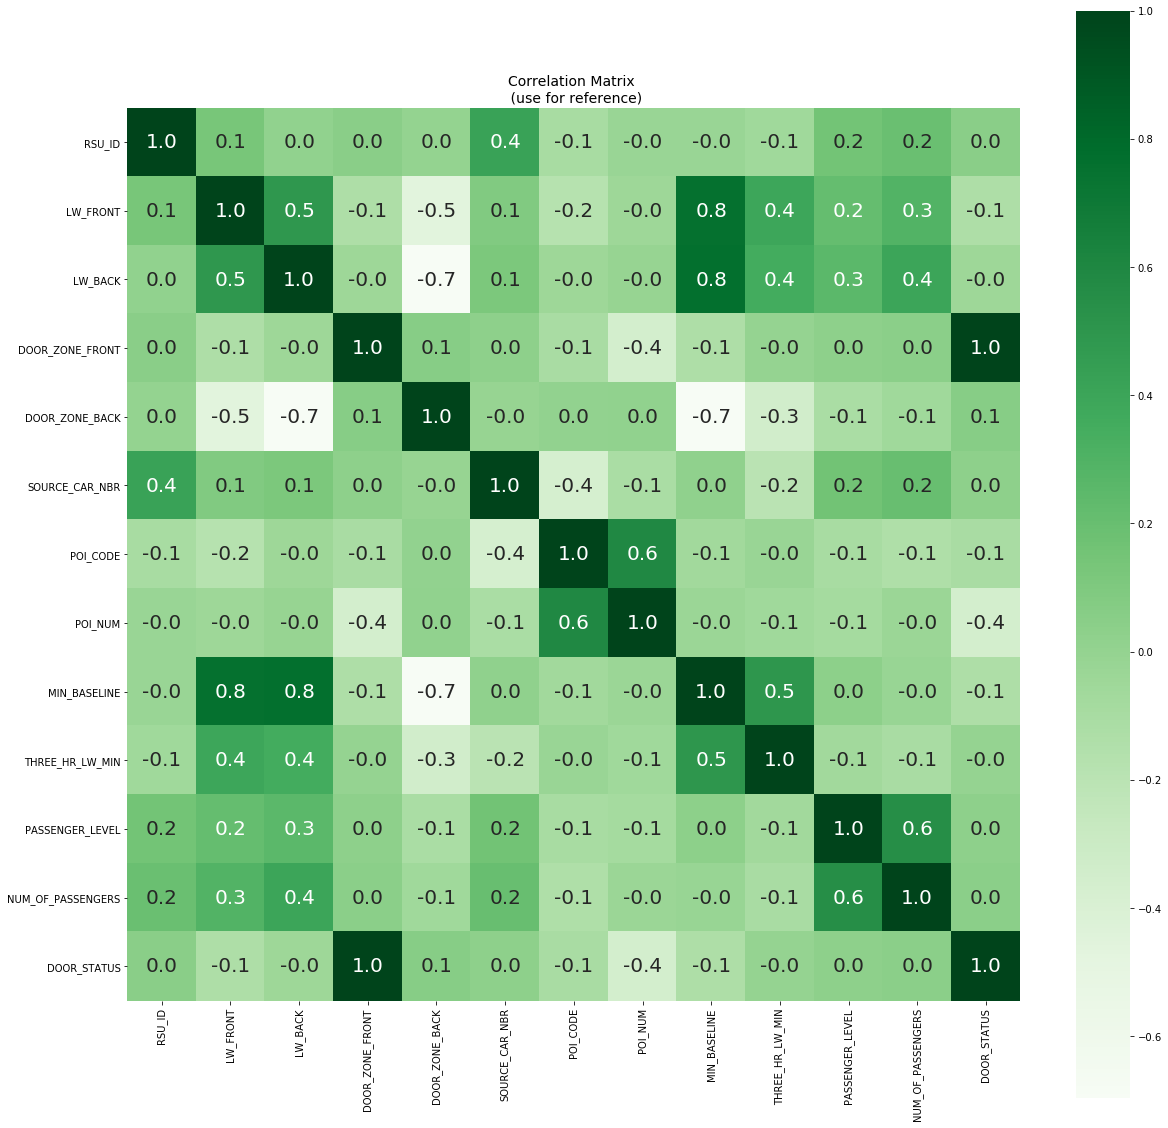

In [325]:

corr = train_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

From the above heatmap, we can analyze that our target variable "MIN_BASELINE" is affected by "LW_FRONT" "LW_BACK" "THREE_HR_LW_MIN"

Undersampling before cross validating (prone to overfit)

In [326]:
X = train_data.drop('MIN_BASELINE', axis=1)  #Feature Matrix
y = train_data['MIN_BASELINE']   #Target Variable

In [327]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [328]:
y.head()

0    0.8
1    0.4
2    0.2
3    0.8
4    0.4
Name: MIN_BASELINE, dtype: float64

### Feature Extraction

Embedded Method

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration

Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [329]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.001177
Best score using built-in LassoCV: 0.944646


In [330]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

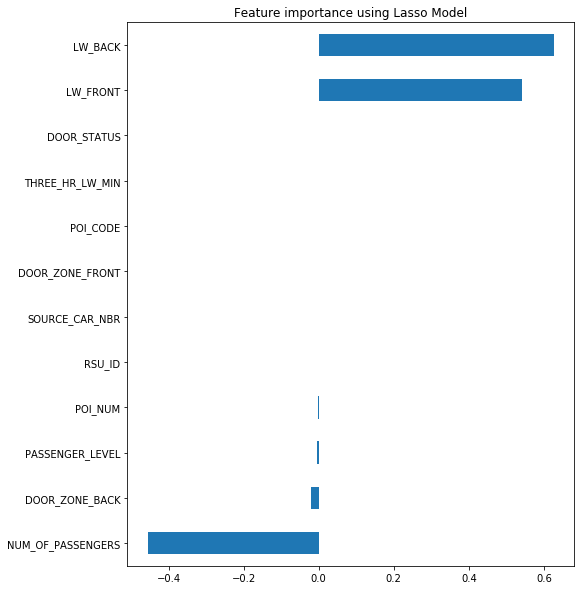

In [331]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

From the above graph, we can see all the features extracted by Embedded method. We will be using these columns in our dataset for training of machine learning models.

In [332]:
coef!=0

RSU_ID                True
LW_FRONT              True
LW_BACK               True
DOOR_ZONE_FRONT      False
DOOR_ZONE_BACK        True
SOURCE_CAR_NBR        True
POI_CODE             False
POI_NUM               True
THREE_HR_LW_MIN      False
PASSENGER_LEVEL       True
NUM_OF_PASSENGERS     True
DOOR_STATUS          False
dtype: bool

In [333]:

train_data.head()

,RSU_ID,LW_FRONT,LW_BACK,DOOR_ZONE_FRONT,DOOR_ZONE_BACK,SOURCE_CAR_NBR,POI_CODE,POI_NUM,MIN_BASELINE,THREE_HR_LW_MIN,PASSENGER_LEVEL,NUM_OF_PASSENGERS,DOOR_STATUS
0,7427,0.833333,0.571429,0.0,0.0,7427,3,6,0.8,0.571429,1.0,0.166667,0
1,7428,0.666667,0.428571,0.0,1.0,7427,3,6,0.4,0.285714,1.0,0.333333,0
2,7182,0.166667,0.142857,1.0,1.0,7181,3,6,0.2,1.000000,0.0,0.000000,1
3,7429,0.500000,0.714286,1.0,0.0,7429,0,0,0.8,0.571429,0.0,0.000000,1
4,7430,0.500000,0.285714,1.0,1.0,7429,0,0,0.4,0.285714,0.0,0.000000,1


In [334]:
drop_list = ["RSU_ID", "LW_FRONT", "LW_BACK", "DOOR_ZONE_BACK", "SOURCE_CAR_NBR", "POI_NUM", "PASSENGER_LEVEL", "NUM_OF_PASSENGERS"]
X = train_data.drop(train_data.columns.difference(drop_list), axis=1)
X.head()

,RSU_ID,LW_FRONT,LW_BACK,DOOR_ZONE_BACK,SOURCE_CAR_NBR,POI_NUM,PASSENGER_LEVEL,NUM_OF_PASSENGERS
0,7427,0.833333,0.571429,0.0,7427,6,1.0,0.166667
1,7428,0.666667,0.428571,1.0,7427,6,1.0,0.333333
2,7182,0.166667,0.142857,1.0,7181,6,0.0,0.000000
3,7429,0.500000,0.714286,0.0,7429,0,0.0,0.000000
4,7430,0.500000,0.285714,1.0,7429,0,0.0,0.000000


In [335]:
new_columns = X.columns
test_data = test_data[new_columns]
test_data.head()

,RSU_ID,LW_FRONT,LW_BACK,DOOR_ZONE_BACK,SOURCE_CAR_NBR,POI_NUM,PASSENGER_LEVEL,NUM_OF_PASSENGERS
0,7264.0,0.015625,0.015075,1.0,7766.0,0,1.0,0.28
1,7765.0,0.020833,0.020101,0.0,7766.0,0,1.0,0.28
2,7766.0,0.020833,0.020101,1.0,7766.0,0,1.0,0.28
3,7576.0,0.020833,0.015075,1.0,7766.0,0,1.0,0.28
4,7575.0,0.020833,0.020101,0.0,7766.0,0,1.0,0.16


Converting y label datatype as "multiclass" to be used in splitting of our dataset

In [336]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

#training_scores_encoded = y

[4 2 1 4 2 3 5 1 4 2 3 1 1 1 1 3 4 2 2 3 1 2 1 2 2 3 2 2 3 2 4 4 1 2 3 2 3
 0 2 1 1 3 2 1 3 4 2 4 2 2 4 2 3 1 3 4 2 1 4 3 1 2 0 3 5 2 4 4 2 2 4 2 2 3
 3 2 1 2 2 4 3 2 3 3 2 5 3 1 1 4 2 4 3 2 3 2 2 4 2 4 1 2 3 1 1 4 1 1 2 3 2
 2 1 3 2 0 1 1 2 2 3 3 1 1 1 2 2 3 1 3 3 2 3 1 3 2 3 1 2 2 3 1 3 2 1 2 1 2
 1 2 4 2 3 3 2 1 3 2 3 1 4 2 3 2]
continuous
binary
multiclass


Splitting the data into training set and test set

In [337]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,training_scores_encoded, test_size = 0.20, random_state = 42)

Create a function to create confusion matrix function to find out sensitivity and specificity

In [338]:
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

### Machine Learning Models

#### Logistic Regression

In [339]:

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

/Users/priyashaji/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [340]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [341]:
# Calculating the accuracy, precision and the recall
from sklearn.metrics import f1_score, classification_report
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_logreg = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
print( 'Total Accuracy : ', acc_logreg )
print( 'F1-score : ', f1_logreg)

Total Accuracy :  45.45
F1-score :  30.3


### Gaussian Naive Bayes

In [342]:
# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [343]:
# Prediction on test set
y_pred = model.predict(X_test)

In [344]:
# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_nb )

Total Accuracy :  57.58


### Decision Tree Classifier

In [345]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [346]:
# Model prediction on train data
y_pred = clf.predict(X_train)

In [347]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]


No handles with labels found to put in legend.


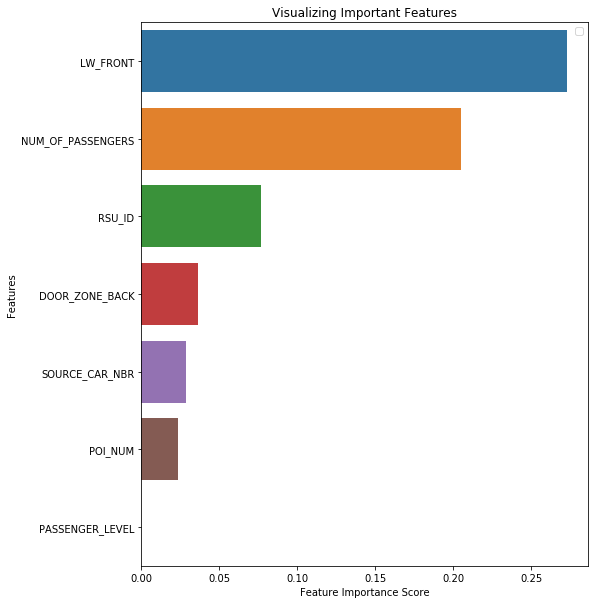

In [348]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Using "compute_feature_importances" function of Decision Tree Classifier, we can see from above grapg that "LW_FRONT" is an important feature for prediction of our model

# Prediction on test set


In [350]:
y_pred = clf.predict(X_test)

In [351]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )

Total Accuracy :  78.79


### Random Forest Classifier

In [353]:
# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


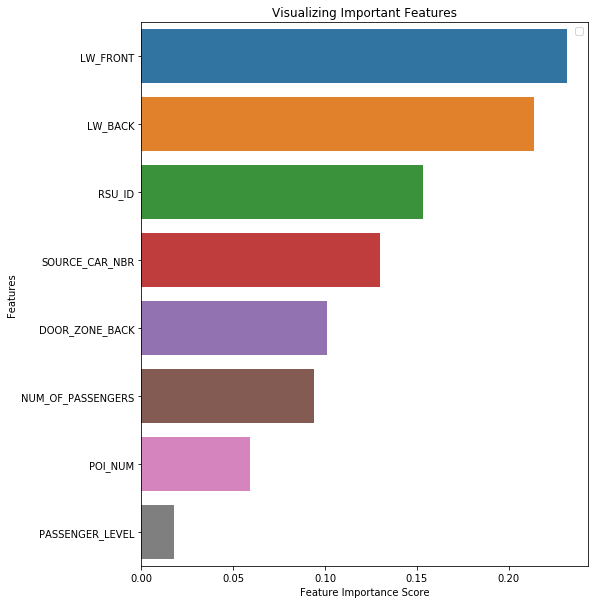

In [354]:
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [355]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [356]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )

Total Accuracy :  78.79


### K - Nearest Neighbors

In [358]:
# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [359]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [360]:
# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_knn = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
print( 'Total Accuracy : ', acc_knn )
print( 'F1-score : ', f1_knn)

Total Accuracy :  24.24
F1-score :  24.34


### eXtreme Gradient Boosting

In [361]:


# Import library of xgboost model
from xgboost import XGBClassifier, plot_importance

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='multi:softmax', silent=True, nthread=1, num_class=5)

# # A parameter grid for XGBoost for Hyperparameter Optimization
# parameters = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 5, 6]
#         }

# # Run the grid search
# grid_obj = GridSearchCV(gbm, parameters)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the rf to the best combination of parameters
# gbm = grid_obj.best_estimator_

# Train the model using the training sets
gbm.fit(X_train, y_train)

[23:57:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=1, nthread=1, num_class=5,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [362]:
# Prediction on test data
y_pred = gbm.predict(X_test)

In [363]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
f1_xgb = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
print( 'Total Accuracy : ', acc_xgb )
print( 'F1-score : ', f1_xgb)

Total Accuracy :  81.82
F1-score :  80.34


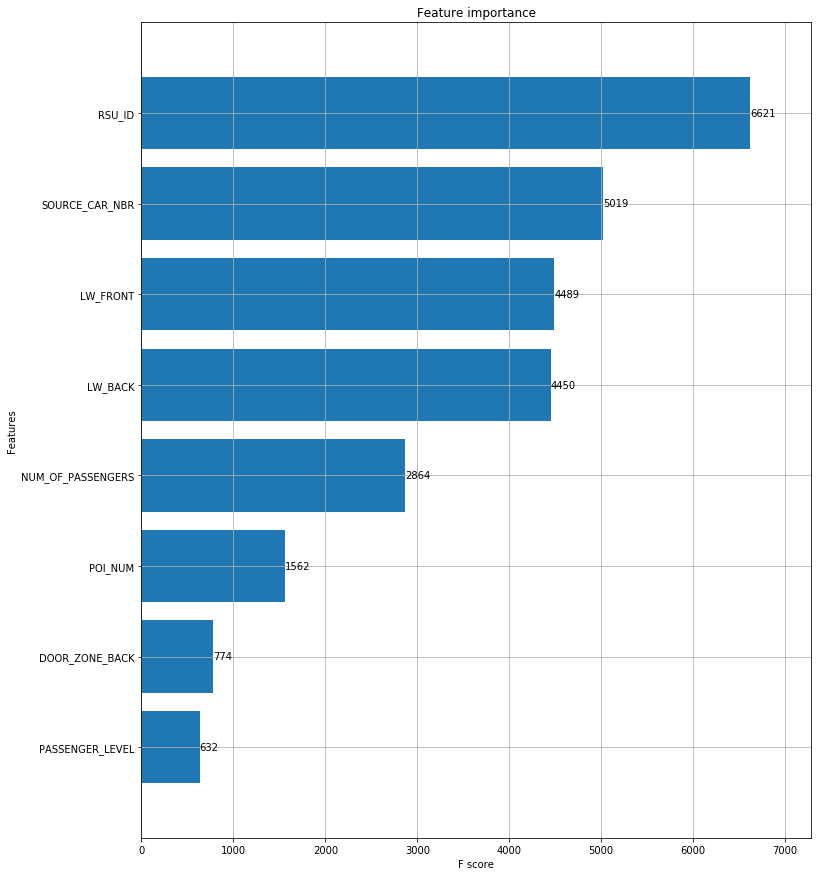

In [364]:
# Feature Engineering
fig, ax = plt.subplots(figsize=(12,15))
plot_importance(gbm, max_num_features=50, height=0.8, ax=ax)
plt.show()

As we analyze the graph above, "RSU_ID" is an important featur for model prediction

In [365]:
gbm.get_booster().get_score(importance_type="gain")

{'LW_FRONT': 0.6267185335654561,
 'RSU_ID': 0.12080021242023846,
 'LW_BACK': 0.6547938453410103,
 'NUM_OF_PASSENGERS': 0.26256860557691775,
 'PASSENGER_LEVEL': 0.3129437545576901,
 'POI_NUM': 0.23650351152076243,
 'SOURCE_CAR_NBR': 0.1128829162060468,
 'DOOR_ZONE_BACK': 1.0261128270010322}

According to the scores above, for eXtreme Gradient Boosting model, "LW_BACK" has more importance than other features

### SVM Classifier

In [366]:
# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [367]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Train the model using the training sets 
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [368]:
# Prediction on test data
y_pred = svc.predict(X_test)

In [369]:
# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_svm )

Total Accuracy :  66.67


### Evaluating and Compairing models for accuracy

In [370]:

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,XGBoost,81.82
2,Decision Tree,78.79
3,Random Forest,78.79
4,Support Vector Machines,66.67
1,Naive Bayes,57.58
0,Logistic Regression,45.45
5,K - Nearest Neighbors,24.24


Now to predict our target variable values, use the dataset which was scored highest for accuracy in the above accuracy table

### Predicting on the test dataset

In [376]:
mtamnr_pred = gbm.predict(test_data)

In [377]:
mtamnr['MIN_BASELINE'] = mtamnr_pred

In [378]:
mtamnr.shape

(823, 2)

In [379]:
mtamnr['MIN_BASELINE'] = mtamnr['MIN_BASELINE'].replace(0, 'low')
mtamnr['MIN_BASELINE'] = mtamnr['MIN_BASELINE'].replace(1, 'medium')
mtamnr['MIN_BASELINE'] = mtamnr['MIN_BASELINE'].replace(2, 'medium')
mtamnr['MIN_BASELINE'] = mtamnr['MIN_BASELINE'].replace(3, 'high')
mtamnr['MIN_BASELINE'] = mtamnr['MIN_BASELINE'].replace(4, 'high')

In [380]:
# Saving predictions to file
mtamnr.to_csv('submission.csv', index=False)
print('Saved file to disk.')

Saved file to disk.
